# Phase1

## Generate Insight with ChatGPT

### Prompt
CASE STUDY :
Our client, an e-commerce platform, wants to gain a deeper understanding of user behavior to improve their platform. The management has identified key analytical needs, including:

- Identifying Top Products: Determine the top-selling products based on total transaction revenue per day. 
- Detecting Anomalies: Identify unusual transaction patterns, such as a sharp increase or decrease in sales for a specific product. 
- Finding Most Profitable Locations: Determine which city or province generates the highest total transaction revenue.

DATASETS : 
The dataset used for this analysis is a subset of the 'data-to-insights.ecommerce.all_sessions' dataset from Google BigQuery. It includes information such as:

- Visitor ID (Unique identifier for visitors) 
- Visit Time (Timestamp of the visit) 
- Product SKU & Product Name (Product identifiers and descriptions) 
- Transaction Count (Number of transactions for each product) 
- City & Province (Geographical data related to transactions)

Help me to structure the analysis, do a preprocessing data for handling missing values and inconsistent data to generate insights

### ChatGPT Response

### ✅ Overview of Dataset Structure

* **Total Rows:** 10,000
* **Relevant Columns for Analysis:**

  * `totalTransactionRevenue`: Revenue generated (non-null in only 619 rows)
  * `transactions`: Count of transactions (628 non-null)
  * `productSKU`, `v2ProductName`: Product identification
  * `productPrice`, `productQuantity`: Pricing and quantity data (quantity has only 45 non-null values)
  * `city`, `country`, `date`: For geographic and temporal insights

---

### 📊 Key Analytical Goals & Data Mapping

| Analytical Goal               | Relevant Columns                                                                 |
| ----------------------------- | -------------------------------------------------------------------------------- |
| **Top Products (daily)**      | `v2ProductName`, `productSKU`, `productPrice`, `date`, `totalTransactionRevenue` |
| **Detecting Anomalies**       | `productSKU`, `totalTransactionRevenue`, `transactions`, `date`                  |
| **Most Profitable Locations** | `city`, `country`, `totalTransactionRevenue`                                     |

---

### 🧹 Data Preprocessing Plan

1. **Handle Missing Values:**

   * Focus on rows where `totalTransactionRevenue` and `transactions` are **not null**.
   * Drop columns that have **100% nulls** like `productRefundAmount`, `transactionId`, `itemQuantity`.

2. **Clean and Convert Data Types:**

   * Convert `date` (YYYYMMDD int) into `datetime`.
   * Ensure `totalTransactionRevenue` is in readable units (usually stored in micros, divide by 1,000,000).

3. **Filter Valid Transactions:**

   * Only keep rows with non-null `totalTransactionRevenue` and `v2ProductName`.

---

### 🛠️ Let’s Begin with Preprocessing

Next, I’ll:

1. Drop irrelevant/null columns.
2. Convert `date` and `totalTransactionRevenue`.
3. Filter for valid transactions.

Proceeding now.


### ✅ Preprocessing Complete

We now have a **clean dataset** of **619 valid transactions**. Here's a snapshot:

| Date       | Product Name                     | SKU     | Revenue (USD) | City          |
| ---------- | -------------------------------- | ------- | ------------- | ------------- |
| 2017-07-26 | Metal Texture Roller Pen         | 9180838 | 67.57         | Ann Arbor     |
| 2017-07-27 | Metal Texture Roller Pen         | 9180838 | 24.71         | Mountain View |
| 2017-07-15 | Google Men's Zip Hoodie          | 9182569 | 123.39        | Houston       |
| 2017-04-16 | Google Men's Hero Tee            | 9182721 | 122.39        | Chicago       |
| 2017-01-04 | Google Women's Yoga Jacket Black | 9182761 | 467.60        | Boulder       |

---

### 📌 Next Steps: Analysis Structure

Here’s how we’ll proceed to generate insights:

#### 1. **Top Products by Day**

* Group by `date` and `v2ProductName`
* Sum `totalTransactionRevenue`
* Rank by day to find top-sellers

#### 2. **Anomaly Detection**

* Aggregate revenue by product over time
* Use rolling average or z-score to detect spikes/drops

#### 3. **Most Profitable Locations**

* Group by `city` or `country`
* Aggregate `totalTransactionRevenue`
* Rank to find top-performing areas

Would you like me to continue with the full analysis and visual insights?

## Evaluate ChatGPT Response

Strengths :
- ChatGPT can tell how much null values for each field
- Give data mapping between goals and fields
- Give a clear analysis structure
- Give a suggestion to drop column with 100% null values

Weaknesses : 
- Drop too many rows and only keep 619 rows. This small subset may be a little to bias to covers all the original data
- productquantity has only 45 non-null values. If we include it, it has no impact at all

# Phase2

## Refine the Analysis

- Drop productquantity because it gives 0 values
- I think drop 95% of total transactions are not wise. Because there are other fields that can give us insight such as timeonsite, pageviews, date. So we can keep all the transactions where timeonsite, pageviews, or date is not null

### Data Processing and Analysis

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv("ecommerce-session-bigquery.csv")
df

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,...,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8518740059623315737,Referral,83144,United States,Ann Arbor,NaN,NaN,561.0,18.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9996,1592171014215970461,Organic Search,302378,Colombia,Bogota,NaN,NaN,365.0,7.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9997,6776942687101397292,Affiliates,41387,Israel,not available in demo dataset,NaN,NaN,107.0,7.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9998,3008082643543388126,Organic Search,28613,Canada,Montreal,NaN,NaN,93.0,11.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN


In [56]:
# see all null values for each column
df.isnull().sum()

fullVisitorId                  0
channelGrouping                0
time                           0
country                        0
city                           0
totalTransactionRevenue     9381
transactions                9372
timeOnSite                   287
pageviews                      1
sessionQualityDim           9981
date                           0
visitId                        0
type                           0
productRefundAmount        10000
productQuantity             9955
productPrice                   0
productRevenue             10000
productSKU                     0
v2ProductName                  0
v2ProductCategory              0
productVariant                 0
currencyCode                 386
itemQuantity               10000
itemRevenue                10000
transactionRevenue         10000
transactionId              10000
pageTitle                     92
searchKeyword              10000
pagePathLevel1                 0
eCommerceAction_type           0
eCommerceA

There are totals 8 columns have 100% null values. We can keep totalTransactionRevenue and transactions but drop productQuantity because it gives no value

In [57]:
df.dtypes

fullVisitorId               uint64
channelGrouping             object
time                         int64
country                     object
city                        object
totalTransactionRevenue    float64
transactions               float64
timeOnSite                 float64
pageviews                  float64
sessionQualityDim          float64
date                         int64
visitId                      int64
type                        object
productRefundAmount        float64
productQuantity            float64
productPrice                 int64
productRevenue             float64
productSKU                  object
v2ProductName               object
v2ProductCategory           object
productVariant              object
currencyCode                object
itemQuantity               float64
itemRevenue                float64
transactionRevenue         float64
transactionId              float64
pageTitle                   object
searchKeyword              float64
pagePathLevel1      

In [58]:
# convert column ['date] from int to datetime
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

In [59]:
# Drop columns and rows that have null values for specific column
df = df.drop(['productQuantity', 'productRevenue', 'itemQuantity', 'itemRevenue', 'transactionRevenue', 
         'transactionId', 'searchKeyword', 'eCommerceAction_option'], axis=1)
df_cleaned = df.dropna(subset=['timeOnSite', 'pageviews', 'date', 'productSKU', 'v2ProductName'])

In [60]:
df_cleaned

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,...,productPrice,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,pageTitle,pagePathLevel1,eCommerceAction_type,eCommerceAction_step
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,...,0,9180781,Suitcase Organizer Cubes,(not set),(not set),USD,NaN,/storeitem.html,0,1
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,...,0,9180793,26 oz Double Wall Insulated Bottle,(not set),(not set),USD,NaN,/storeitem.html,0,1
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,...,0,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,/storeitem.html,0,1
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,...,0,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,/storeitem.html,0,1
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,...,0,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,/storeitem.html,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8518740059623315737,Referral,83144,United States,Ann Arbor,NaN,NaN,561.0,18.0,NaN,...,4990000,GGOEGBMJ013399,Sport Bag,Home/Limited Supply/Bags/,(not set),USD,Bags,/google+redesign/,0,1
9996,1592171014215970461,Organic Search,302378,Colombia,Bogota,NaN,NaN,365.0,7.0,NaN,...,4990000,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,0,1
9997,6776942687101397292,Affiliates,41387,Israel,not available in demo dataset,NaN,NaN,107.0,7.0,NaN,...,4990000,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,0,1
9998,3008082643543388126,Organic Search,28613,Canada,Montreal,NaN,NaN,93.0,11.0,NaN,...,4990000,GGOEGBMJ013399,Sport Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,0,1


In [61]:
# Identifying Top Products
# Aggregate total revenue per product per day
daily_product_revenue = (
    df_cleaned.groupby(['date', 'v2ProductName'])['totalTransactionRevenue']
    .sum()
    .reset_index()
)

# For each day, get the product with the highest total revenue
top_product_per_day = (
    daily_product_revenue.groupby('date', group_keys=False)
    .apply(lambda x: x.nlargest(1, 'totalTransactionRevenue'))
    .reset_index(drop=True)
)

<ipython-input-61-bba8e36fe838>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(1, 'totalTransactionRevenue'))


In [62]:
top_product_per_day

,date,v2ProductName,totalTransactionRevenue
0,2016-08-01,Chevron Shopper,144790000.0
1,2016-08-02,Chevron Shopper,191200000.0
2,2016-08-03,Chevron Shopper,0.0
3,2016-08-04,Google Lunch Bag,113850000.0
4,2016-08-05,Chevron Shopper,264780000.0
...,...,...,...
131,2017-07-26,Metal Texture Roller Pen,67570000.0
132,2017-07-27,Metal Texture Roller Pen,24710000.0
133,2017-07-28,Google Women's Short Sleeve Hero Tee Black,0.0
134,2017-07-31,Metal Texture Roller Pen,0.0


In [70]:
top_product_per_day = top_product_per_day[top_product_per_day['totalTransactionRevenue'] != 0]
top_product_per_day.head()

,date,v2ProductName,totalTransactionRevenue
0,2016-08-01,Chevron Shopper,1.447900e+08
1,2016-08-02,Chevron Shopper,1.912000e+08
3,2016-08-04,Google Lunch Bag,1.138500e+08
4,2016-08-05,Chevron Shopper,2.647800e+08
5,2016-08-06,Waterpoof Gear Bag,1.157700e+09


In [64]:
# Count of Top products for each day
top_product_per_day['v2ProductName'].value_counts()

v2ProductName
Electronics Accessory Pouch                             7
Google Canvas Tote Natural/Navy                         6
Collapsible Shopping Bag                                6
Google Lunch Bag                                        5
Reusable Shopping Bag                                   5
Chevron Shopper                                         4
Sport Bag                                               3
Straw Beach Mat                                         3
1 oz Hand Sanitizer                                     3
Google Sunglasses                                       3
Google Zipper-front Sports Bag                          3
Waterproof Gear Bag                                     2
Latitudes Foldaway Shopper                              2
Google Leather Perforated Journal                       2
Google Tote Bag                                         2
SPF-15 Slim & Slender Lip Balm                          2
Google Pet Feeding Mat                                  2


We can see top product for each day, at 2016-08-01 Chevron Sopper was the top product at that day. Top Products Electronics Accessory Pouch, Google Canvas Tote Natural/Navy, Collapsible Shopping Bag

In [65]:
# Finding Most Profitable Locations
location = (df_cleaned.groupby('country')['totalTransactionRevenue']
    .sum()
    .reset_index()
    .sort_values('totalTransactionRevenue', ascending=False)
    .reset_index(drop=True)
    )

In [71]:
location.head()

,country,totalTransactionRevenue
0,United States,1.104420e+11
1,Venezuela,1.004466e+10
2,Canada,8.142560e+09
3,Taiwan,7.971000e+08
4,Curaçao,2.083300e+08


Top Country with the highest revenue is United States

In [67]:
product_revenue = (
    df_cleaned.groupby(['date', 'v2ProductName'])['totalTransactionRevenue']
    .sum()
    .reset_index()
)

In [68]:
product_revenue

,date,v2ProductName,totalTransactionRevenue
0,2016-08-01,1 oz Hand Sanitizer,0.0
1,2016-08-01,Bottle Opener Clip,0.0
2,2016-08-01,Chevron Shopper,144790000.0
3,2016-08-01,Electronics Accessory Pouch,0.0
4,2016-08-01,Kick Ball,0.0
...,...,...,...
1117,2017-07-27,Metal Texture Roller Pen,24710000.0
1118,2017-07-28,Google Women's Short Sleeve Hero Tee Black,0.0
1119,2017-07-28,Metal Texture Roller Pen,0.0
1120,2017-07-31,Metal Texture Roller Pen,0.0


<ipython-input-69-5286bbd121b8>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


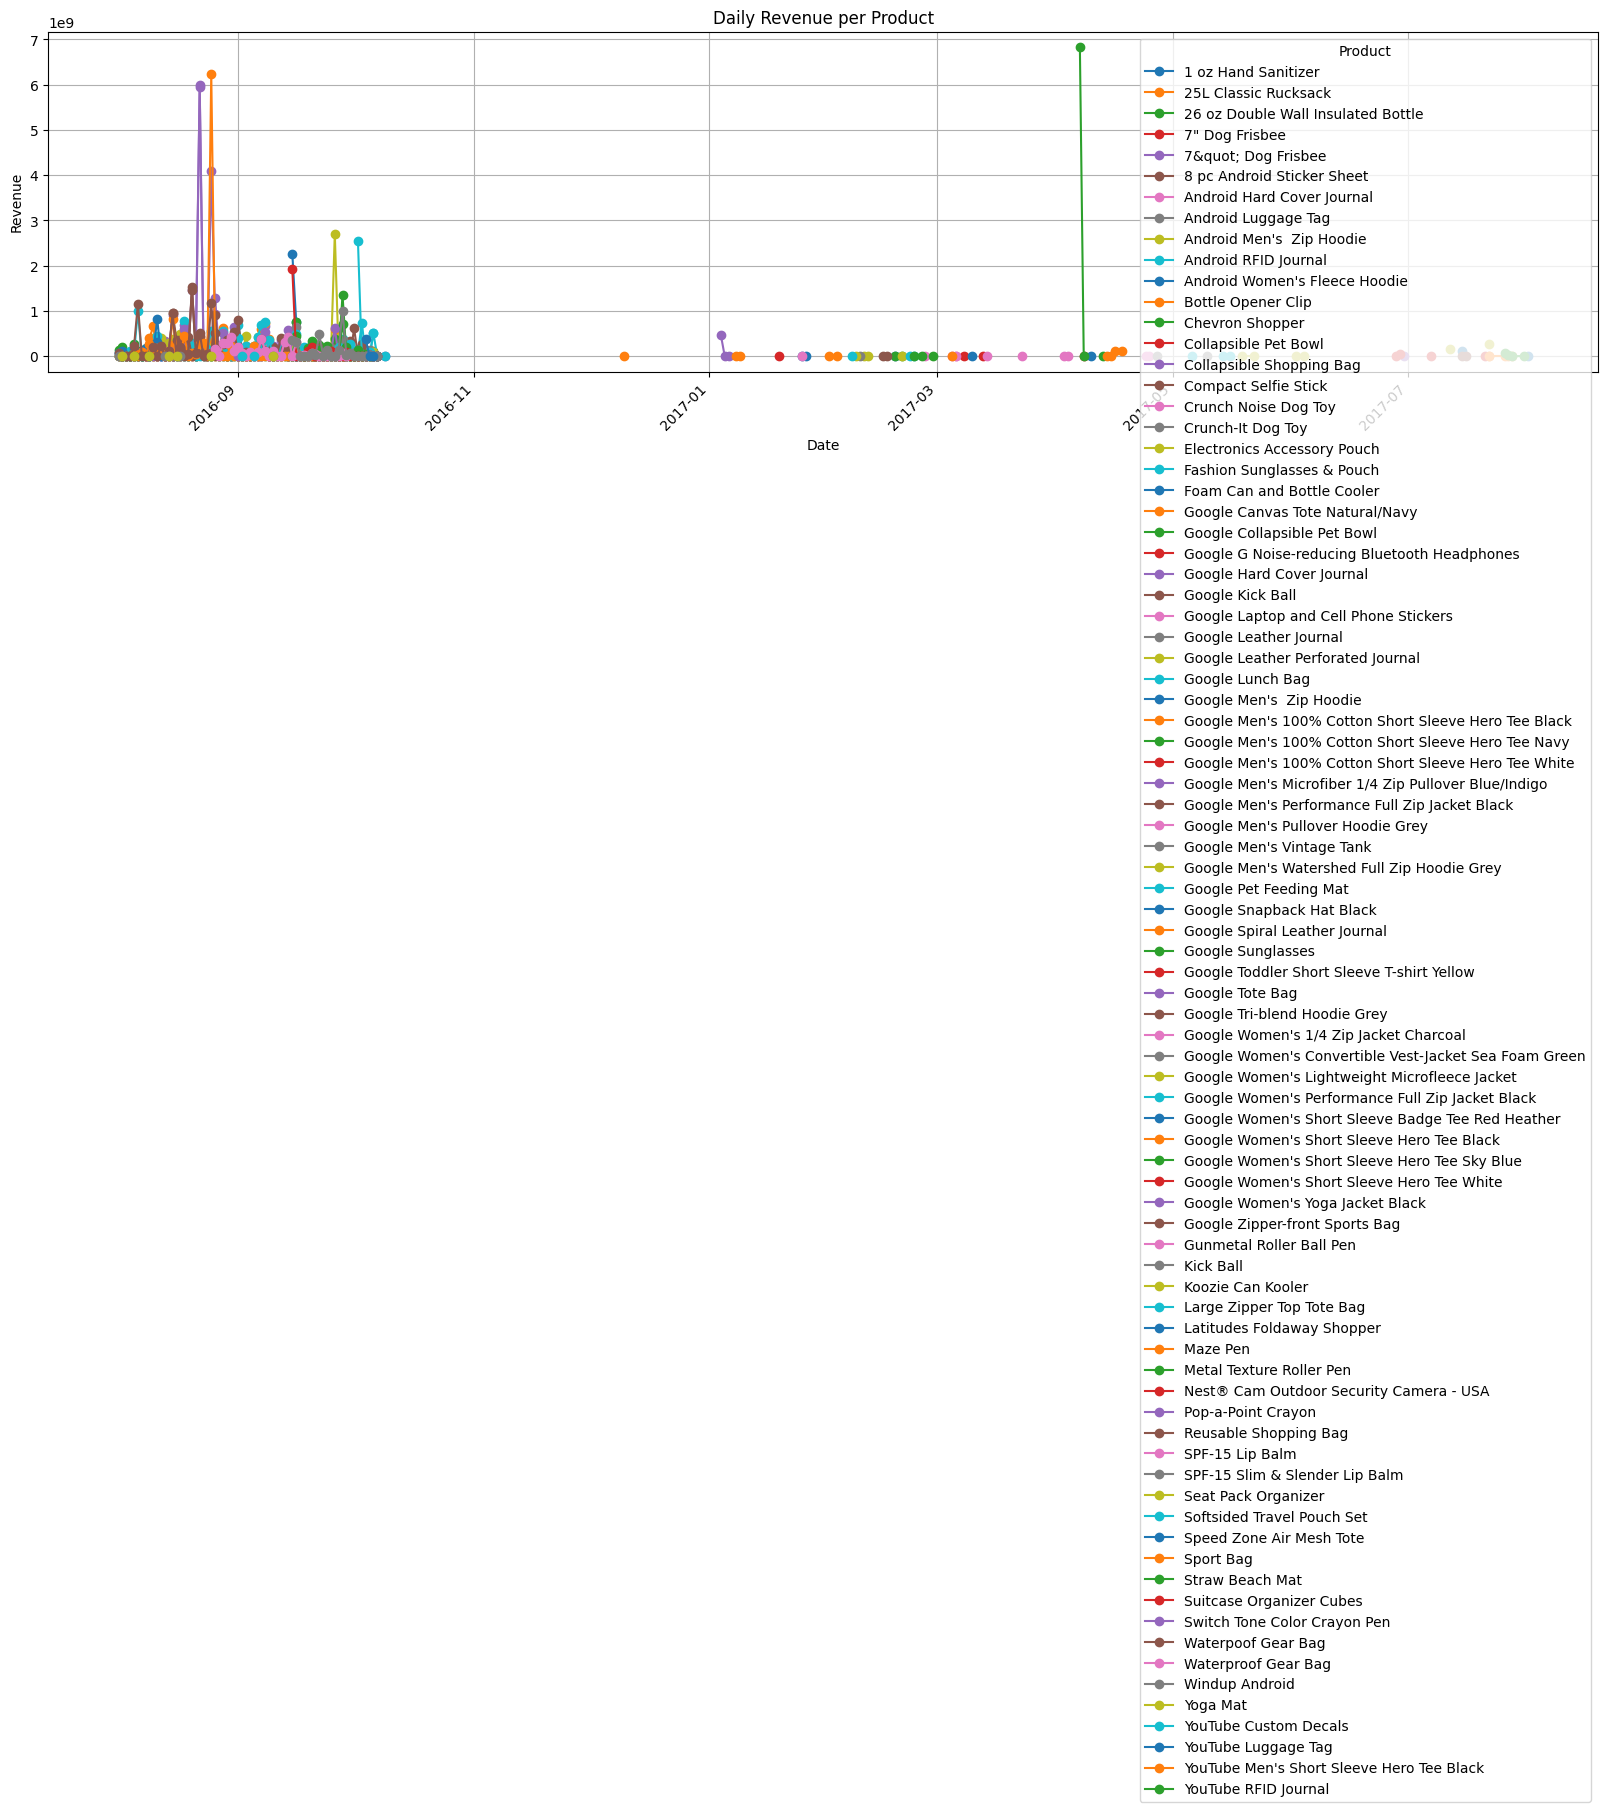

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot the table: each product becomes a column
pivot_df = product_revenue.pivot(index='date', columns='v2ProductName', values='totalTransactionRevenue')

# Plot
pivot_df.plot(figsize=(20, 5), marker='o')

# Formatting
plt.title("Daily Revenue per Product")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Product")

# Show the plot
plt.show()

We can see based on chart that transactions mostly were made at 2016-08 until 2016-10. Unusual transaction like sharp increase in revenue rarely to happen. There are total of 6 transaction that anomaly. But the anomaly pattern is quite random.

## Provide Justifications for Improvements

df = df.drop(['productQuantity', 'productRevenue', 'itemQuantity', 'itemRevenue', 'transactionRevenue', 
         'transactionId', 'searchKeyword', 'eCommerceAction_option'], axis=1)
df_cleaned = df.dropna(subset=['timeOnSite', 'pageviews', 'date', 'productSKU', 'v2ProductName'])

- these drop columns and rows is necessary to avoid unnecesary data that improve data quality
- data types column date need to be converted to timestamp to perform daily analysis 
- keep the gap between transactions to enrich our data

## Final Insights & Recommendations

- United States, Venezuela, and Canada are countries thath have the highest revenue. Consider launching regional promotions there
- Most of the transactions happened at 2016-08 until 2016-10. We can check further what is happening during that period.
- We can consider to give a discount for top products such as Electronics Accessory Pouch, Google Canvas Tote Natural/Navy, Collapsible Shopping Bag